ライブラリインポート

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import japanize_matplotlib  

# Pythonの検索パスにディレクトリを追加
import sys
sys.path.append('../../database/functions/')

from datacollect import (
  get_yfinanceInfo,
  )

企業データの取得

In [490]:
# tickerの設定
tickers = ["9984.T", "MSFT"]

# データの取得
data = get_yfinanceInfo(tickers)

# 各種データフレームを格納するための辞書を作成
financial_statements = {}

# 各ティッカーに対してループ
for ticker in tickers:
    company_data = data[ticker]
    financial_statements[ticker] = {
        "income_stmt": company_data.income_stmt,
        "balance_sheet": company_data.balance_sheet,
        "cash_flow": company_data.cash_flow
    }

# これで、financial_statements 辞書を使用して各ティッカーの財務諸表にアクセスできます
# 例えば、SBGの財務諸表にアクセスするには以下のようにします
SBG_PL = financial_statements["9984.T"]["income_stmt"]
SBG_BS = financial_statements["9984.T"]["balance_sheet"]
SBG_CF = financial_statements["9984.T"]["cash_flow"]

# MSFT の財務諸表にアクセスする場合も同様です
MSFT_PL = financial_statements["MSFT"]["income_stmt"]
MSFT_BS = financial_statements["MSFT"]["balance_sheet"]
MSFT_CF = financial_statements["MSFT"]["cash_flow"]

財務諸表の項目の日本語訳

In [491]:
# インデックスとその日本語訳の完全なマッピング
index_translation = {
    'Tax Effect Of Unusual Items': '特別項目の税効果',
    'Tax Rate For Calcs':   '計算用税率',
    'Normalized EBITDA': '調整後EBITDA',
    'Total Unusual Items': '特別項目合計',
    'Total Unusual Items Excluding Goodwill': 'のれんを除く特別項目合計',
    'Net Income From Continuing Operation Net Minority Interest': '継続事業の純利益（少数株主の権益を除く）',
    'Reconciled Depreciation': '調整後減価償却費',
    'Reconciled Cost Of Revenue': '調整後売上原価',
    'EBITDA': 'EBITDA',
    'EBIT': 'EBIT',
    'Net Interest Income': '純利息収入',
    'Interest Expense': '利息費用',
    'Interest Income': '利息収入',
    'Normalized Income': '正常化所得',
    'Net Income From Continuing And Discontinued Operation': '継続および中止事業からの純利益',
    'Total Expenses': '費用合計',
    'Total Operating Income As Reported': '報告された営業収入合計',
    'Diluted Average Shares': '希薄化後平均株式数',
    'Basic Average Shares': '基本平均株式数',
    'Diluted EPS': '希薄化後EPS',
    'Basic EPS': '基本EPS',
    'Diluted NI Availto Com Stockholders': '普通株主に帰属する希薄化後純利益',
    'Net Income Common Stockholders': '普通株主の純利益',
    'Net Income': '純利益',
    'Net Income Including Noncontrolling Interests': '非支配株主利益を含む純利益',
    'Net Income Continuous Operations': '継続事業の純利益',
    'Tax Provision': '税金引当',
    'Pretax Income': '税引前所得',
    'Other Income Expense': 'その他の収益・費用',
    'Other Non Operating Income Expenses': 'その他の営業外収益・費用',
    'Special Income Charges': '特別収入費用',
    'Write Off': '償却',
    'Gain On Sale Of Security': '有価証券売却益',
    'Net Non Operating Interest Income Expense': '営業外純利息収入（費用）',
    'Interest Expense Non Operating': '営業外利息費用',
    'Interest Income Non Operating': '営業外利息収入',
    'Operating Income': '営業収入',
    'Operating Expense': '営業費用',
    'Research And Development': '研究開発費',
    'Selling General And Administration': '販売一般管理費',
    'Selling And Marketing Expense': '販売及びマーケティング費用',
    'General And Administrative Expense': '一般管理費',
    'Other Gand A': 'その他のG&A',
    'Gross Profit': '粗利益',
    'Cost Of Revenue': '売上原価',
    'Total Revenue': '総収益',
    'Operating Revenue': '営業収益'
}

# MSFT_IS のインデックスを日本語に更新
new_index = [index_translation.get(index, index) for index in MSFT_IS.index]

# 新しいインデックスでデータフレームを更新
MSFT_PL.index = new_index

# 更新されたインデックスを表示
MSFT_PL

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
特別項目の税効果,-2850000.0,43420000.0,180160797.164637,4760000.0
計算用税率,0.19,0.13,0.138266,0.17
調整後EBITDA,105155000000.0,99905000000.0,83831000000.0,68395000000.0
特別項目合計,-15000000.0,334000000.0,1303000000.0,28000000.0
のれんを除く特別項目合計,-15000000.0,334000000.0,1303000000.0,28000000.0
継続事業の純利益（少数株主の権益を除く）,72361000000.0,72738000000.0,61271000000.0,44281000000.0
調整後減価償却費,13861000000.0,14460000000.0,11686000000.0,12796000000.0
調整後売上原価,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBITDA,105140000000.0,100239000000.0,85134000000.0,68423000000.0
EBIT,91279000000.0,85779000000.0,73448000000.0,55627000000.0


棒グラフで確認

In [520]:
def plot_bar(dataframe, index):
    """
    yfinanceの財務諸表からPandasシリーズから棒グラフを作成して表示する関数。
    :param dataframe: データフレーム
    :param index: インデックス
    """
    # 該当インデックスのdataframeの作成
    df = dataframe.loc[index] # 行の抽出
    df = pd.DataFrame(df) # データフレームの作成
    df = df.reset_index() # インデックスの振り直し
    df = df.rename(columns={'index':'Date'}) # index をDateに設定
    df['Date'] = pd.to_datetime(df['Date']).dt.date # シリーズのインデックスを日付のみの形式に変換

    # dataframeの確認
    display(df)

    # 出力データの選定
    x = df.index # x軸の選定
    y = df[index] # y軸の選定

    # グラフフレームの作成
    fig, ax = plt.subplots()

    # ラベル用データの作成
    x_datalabel = df[index]/1000000

    # 棒グラフの作成
    main_graph = ax.bar(
        x, #x軸
        y, # y軸
        width = 0.8, # 棒の太さ
        tick_label = df['Date'], # x軸のラベル
        color='orange',
        )
    ax.set_title(index)
    ax.set_ylabel('Value') # y軸ラベル
    ax.set_xlabel('Date') # x軸ラベル
    ax.bar_label(main_graph, labels=x_datalabel)
    plt.show() # グラフの表示

,Date,調整後EBITDA
0,2023-06-30,105155000000.0
1,2022-06-30,99905000000.0
2,2021-06-30,83831000000.0
3,2020-06-30,68395000000.0


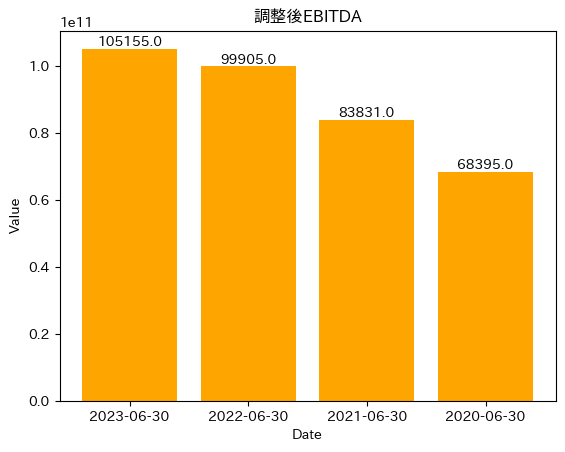

In [521]:
plot_bar(MSFT_PL, '調整後EBITDA')

複数の棒グラフで確認

In [530]:
df = MSFT_PL

In [531]:
import matplotlib.pyplot as plt
import pandas as pd

def prepare_dataframe(df, index_names):
    """
    指定されたインデックスリストのデータフレームを準備する関数。
    """
    dataframes = {}
    for index_name in index_names:
        temp_df = pd.DataFrame(df.loc[index_name]).reset_index()
        temp_df = temp_df.rename(columns={'index': 'Date', index_name: index_name})
        temp_df['Date'] = pd.to_datetime(temp_df['Date']).dt.date
        dataframes[index_name] = temp_df
    return dataframes

def plot_subplots(dataframe, index_names, colors):
    """
    指定されたデータフレームとインデックスのリストに基づいてサブプロットでグラフを表示する関数。
    1行に最大3つのグラフを表示し、3の倍数で新しい行に表示します。
    """
    # サブプロットの設定
    num_plots = len(index_names)
    ncols = 3  # 1行に表示する列数を3に設定
    nrows = -(-num_plots // ncols)  # 切り上げ除算を使用して行数を計算
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows), sharey=True)
    axs = axs.flatten()  # axsを1次元リストに変換

    # データぼ描画
    for i, index_name in enumerate(index_names):
        df_temp = prepare_dataframe(dataframe, [index_name])[index_name]
        
        
        # グラフの描画
        ax = axs[i]
        graph = ax.bar(
            df_temp.index,
            df_temp[index_name],
            tick_label = df_temp['Date'],
            color=colors)
        
        # グラフのオプション
        ax.set_title(index_name)
        ax.set_xlabel('Date')
        # ax.set_ylabel(index_name)
        ax.tick_params(axis='x', rotation=45)
        
        # データラベルの作成
        x_datalabel = df_temp[index_name]/1000000
        ax.bar_label(graph, labels=x_datalabel)


    # 使用されていないサブプロットを非表示にする
    for j in range(i + 1, nrows * ncols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


In [532]:
df.index

Index(['特別項目の税効果', '計算用税率', '調整後EBITDA', '特別項目合計', 'のれんを除く特別項目合計',
       '継続事業の純利益（少数株主の権益を除く）', '調整後減価償却費', '調整後売上原価', 'EBITDA', 'EBIT',
       '純利息収入', '利息費用', '利息収入', '正常化所得', '継続および中止事業からの純利益', '費用合計',
       '報告された営業収入合計', '希薄化後平均株式数', '基本平均株式数', '希薄化後EPS', '基本EPS',
       '普通株主に帰属する希薄化後純利益', '普通株主の純利益', '純利益', '非支配株主利益を含む純利益', '継続事業の純利益',
       '税金引当', '税引前所得', 'その他の収益・費用', 'その他の営業外収益・費用', '特別収入費用', '償却', '有価証券売却益',
       '営業外純利息収入（費用）', '営業外利息費用', '営業外利息収入', '営業収入', '営業費用', '研究開発費',
       '販売一般管理費', '販売及びマーケティング費用', '一般管理費', 'その他のG&A', '粗利益', '売上原価', '総収益',
       '営業収益'],
      dtype='object')

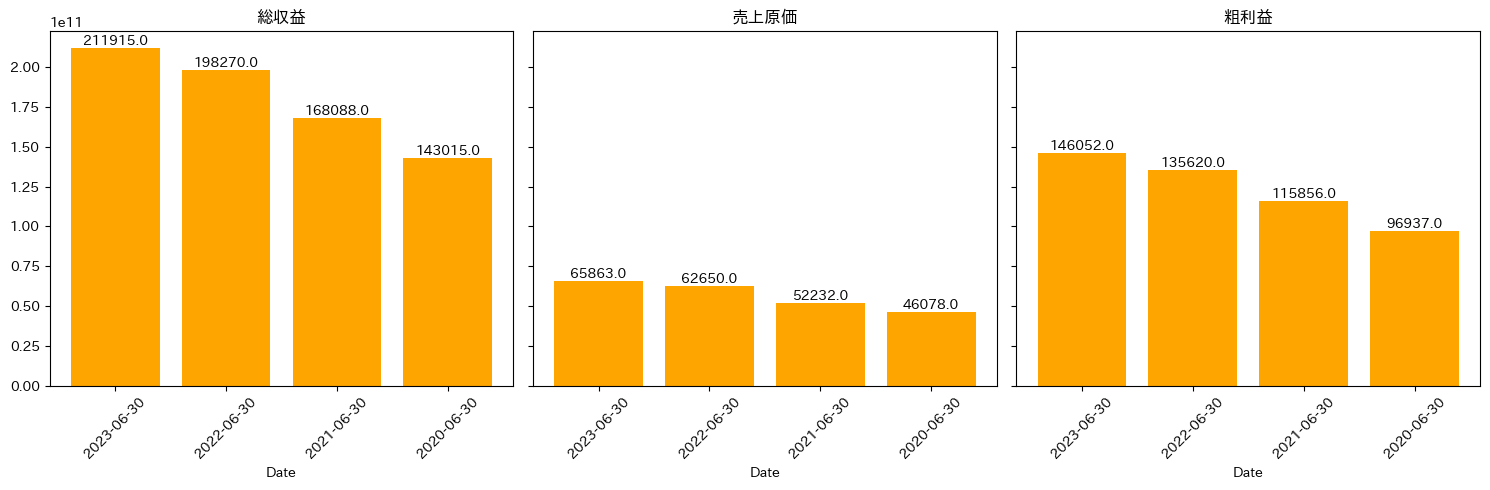

In [533]:
df = MSFT_PL
index_names = ['総収益', '売上原価','粗利益',]
colors = ['orange']

# サブプロットでグラフを表示
plot_subplots(df, index_names, colors)

In [504]:
income_statement_items = [
    '総収益',
    '売上原価',
    '粗利益',
    '研究開発費',
    '販売一般管理費',
    '販売及びマーケティング費用',
    '一般管理費',
    'その他のG&A',
    '営業収入',
    '営業費用',
    'EBITDA',
    '調整後EBITDA',
    'EBIT',
    '利息収入',
    '利息費用',
    '純利息収入',
    'その他の収益・費用',
    'その他の営業外収益・費用',
    '営業外純利息収入（費用）',
    '営業外利息費用',
    '営業外利息収入',
    '特別収入費用',
    '有価証券売却益',
    '特別項目合計',
    'のれんを除く特別項目合計',
    '特別項目の税効果',
    '税引前所得',
    '税金引当',
    '正常化所得',
    '継続事業の純利益',
    '継続および中止事業からの純利益',
    '普通株主の純利益',
    '非支配株主利益を含む純利益',
    '純利益',
    '計算用税率',
    '償却',
    '調整後減価償却費',
    '調整後売上原価',
    '報告された営業収入合計',
    '費用合計',
    '希薄化後平均株式数',
    '基本平均株式数',
    '希薄化後EPS',
    '基本EPS',
    '普通株主に帰属する希薄化後純利益'
]


In [535]:
# 既存のデータフレームのインデックスを再配置するための関数
def reorder_dataframe(df, new_order):
    """
    データフレームのインデックスを新しい順序に再配置します。
    Parameters:
    - df: pandas.DataFrame, 再配置するデータフレーム。
    - new_order: list of str, 新しいインデックスの順序。
    Returns:- reindexed_df: pandas.DataFrame, 再配置されたデータフレーム。
    """
    # データフレームのインデックスが新しい順序リストに存在する場合のみ再配置
    reindexed_df = df.reindex(new_order)
    return reindexed_df

reordered_df = reorder_dataframe(MSFT_PL, income_statement_items)
# 再配置されたデータフレームの確認
reordered_df

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
総収益,211915000000.0,198270000000.0,168088000000.0,143015000000.0
売上原価,65863000000.0,62650000000.0,52232000000.0,46078000000.0
粗利益,146052000000.0,135620000000.0,115856000000.0,96937000000.0
研究開発費,27195000000.0,24512000000.0,20716000000.0,19269000000.0
販売一般管理費,30334000000.0,27725000000.0,25224000000.0,24709000000.0
販売及びマーケティング費用,22759000000.0,21825000000.0,20117000000.0,19598000000.0
一般管理費,7575000000.0,5900000000.0,5107000000.0,5111000000.0
その他のG&A,7575000000.0,5900000000.0,5107000000.0,5111000000.0
営業収入,88523000000.0,83383000000.0,69916000000.0,52959000000.0
営業費用,57529000000.0,52237000000.0,45940000000.0,43978000000.0
